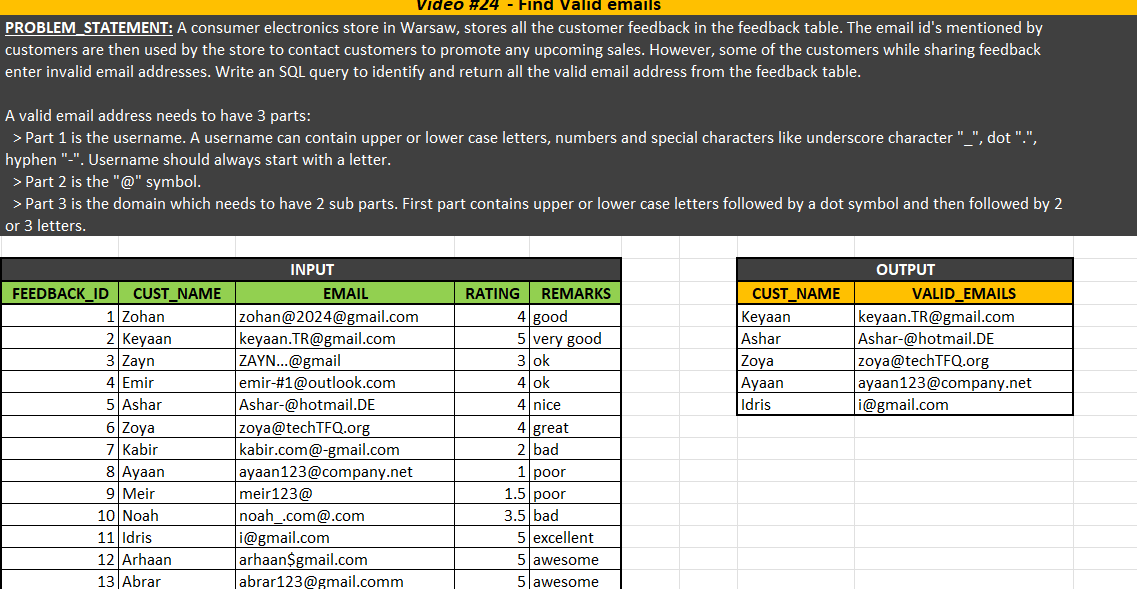

In [30]:
import pandas as pd

# Create a list of dictionaries
data = [
    {"FEEDBACK_ID": 1, "CUST_NAME": "Zohan", "EMAIL": "zohan@2024@gmail.com", "RATING": 4, "REMARKS": "good"},
    {"FEEDBACK_ID": 2, "CUST_NAME": "Keyaan", "EMAIL": "keyaan.TR@gmail.com", "RATING": 5, "REMARKS": "very good"},
    {"FEEDBACK_ID": 3, "CUST_NAME": "Zayn", "EMAIL": "ZAYN...@gmail", "RATING": 3, "REMARKS": "ok"},
    {"FEEDBACK_ID": 4, "CUST_NAME": "Emir", "EMAIL": "emir-#1@outlook.com", "RATING": 4, "REMARKS": "ok"},
    {"FEEDBACK_ID": 5, "CUST_NAME": "Ashar", "EMAIL": "Ashar-@hotmail.DE", "RATING": 4, "REMARKS": "nice"},
    {"FEEDBACK_ID": 6, "CUST_NAME": "Zoya", "EMAIL": "zoya@techTFQ.org", "RATING": 4, "REMARKS": "great"},
    {"FEEDBACK_ID": 7, "CUST_NAME": "Kabir", "EMAIL": "kabir.com@-gmail.com", "RATING": 2, "REMARKS": "bad"},
    {"FEEDBACK_ID": 8, "CUST_NAME": "Ayaan", "EMAIL": "ayaan123@company.net", "RATING": 1, "REMARKS": "poor"},
    {"FEEDBACK_ID": 9, "CUST_NAME": "Meir", "EMAIL": "meir123@", "RATING": 1.5, "REMARKS": "poor"},
    {"FEEDBACK_ID": 10, "CUST_NAME": "Noah", "EMAIL": "noah_.com@.com", "RATING": 3.5, "REMARKS": "bad"},
    {"FEEDBACK_ID": 11, "CUST_NAME": "Idris", "EMAIL": "i@gmail.com", "RATING": 5, "REMARKS": "excellent"},
    {"FEEDBACK_ID": 12, "CUST_NAME": "Arhaan", "EMAIL": "arhaan$gmail.com", "RATING": 5, "REMARKS": "awesome"},
    {"FEEDBACK_ID": 13, "CUST_NAME": "Abrar", "EMAIL": "abrar123@gmail.comm", "RATING": 5, "REMARKS": "awesome"}
]

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    FEEDBACK_ID CUST_NAME                 EMAIL  RATING    REMARKS
0             1     Zohan  zohan@2024@gmail.com     4.0       good
1             2    Keyaan   keyaan.TR@gmail.com     5.0  very good
2             3      Zayn         ZAYN...@gmail     3.0         ok
3             4      Emir   emir-#1@outlook.com     4.0         ok
4             5     Ashar     Ashar-@hotmail.DE     4.0       nice
5             6      Zoya      zoya@techTFQ.org     4.0      great
6             7     Kabir  kabir.com@-gmail.com     2.0        bad
7             8     Ayaan  ayaan123@company.net     1.0       poor
8             9      Meir              meir123@     1.5       poor
9            10      Noah        noah_.com@.com     3.5        bad
10           11     Idris           i@gmail.com     5.0  excellent
11           12    Arhaan      arhaan$gmail.com     5.0    awesome
12           13     Abrar   abrar123@gmail.comm     5.0    awesome


In [31]:
import re

# Patterns for validating user name and domain parts
user_name_pattern = r'^[a-zA-Z][a-zA-Z0-9_.-]*$'
domain_pattern = r'^[a-zA-Z]+$'

def validate_email(email):
    # Split the email into user name and domain parts
    try:
        user_name, domain_name = email.split('@')
    except ValueError:
        return 0  # Return 0 if the email does not contain exactly one '@'

    # Split domain name into first and second parts
    try:
        first_part_domain, second_part_domain = domain_name.split('.')
    except ValueError:
        return 0  # Return 0 if the domain does not contain exactly one '.'

    # Validate the second part of the domain (2 or 3 characters, e.g., 'com', 'org')
    if len(second_part_domain) not in [2, 3]:
        return 0

    # Ensure both user name and domain parts match the patterns
    if re.match(user_name_pattern, user_name) and \
       re.match(domain_pattern, first_part_domain) and \
       re.match(domain_pattern, second_part_domain):
        return 1  # Valid email
    else:
        return 0  # Invalid email

# Apply the validation function to the 'EMAIL' column
df["valid-email"] = df["EMAIL"].apply(validate_email)

df[df["valid-email"]==1][["CUST_NAME", "EMAIL"]]

,CUST_NAME,EMAIL
1,Keyaan,keyaan.TR@gmail.com
4,Ashar,Ashar-@hotmail.DE
5,Zoya,zoya@techTFQ.org
7,Ayaan,ayaan123@company.net
10,Idris,i@gmail.com
